## DETECCIÓN DE OUTLIERS

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

c:\Users\acasa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
# Carga de datos.
df = pd.read_csv("./res/outliers.csv")
print(df)

NameError: name 'pd' is not defined

### 1) EllipticEnvelope()

In [4]:
# Entrenamos un objeto de tipo EllipticEnvelope
algorithm = EllipticEnvelope(support_fraction=None, contamination=0.25, random_state=42)
outlier_method = algorithm.fit(df)

# Aplicamos el método de detección de outliers entrenado sobre nuesto dataset
df_outliers = outlier_method.predict(df)
print(df_outliers)

# Determinar la posición de los outliers
pos_outliers = np.where(df_outliers==-1)[0]
print('\nOutliers en la posición: \n', pos_outliers)

# Determinar el número de outliers
print('\nNúmero de outliers: \n', len(pos_outliers))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]

Outliers en la posición: 
 [150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199]

Número de outliers: 
 50


In [5]:
# Definimos una función que, dado un determinado "df" y un "algorithm", devuelva la matriz y la posición de outliers
def find_outliers(df, algorithm):
    
    outlier_method = algorithm.fit(df)
    df_outliers = outlier_method.predict(df)
    pos_outliers = np.where(df_outliers==-1)[0]

    return df_outliers, pos_outliers

In [6]:
algorithm = EllipticEnvelope(support_fraction=None, contamination=0.25, random_state=42)


df_outliers, pos_outliers = find_outliers(df, algorithm)

In [ ]:
display ()

### 2) Otros métodos similares

In [8]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

IF = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto')

# LOF = ???

df_outliers, pos_outliers = find_outliers(df, IF)
print(len(pos_outliers))

50


In [ ]:
OC_SVM = OneClassSVM()

In [ ]:
# Eliminamos los outliers
new_df = df[df_outliers==1]
print(new_df)

### 3) Box plot

limite inferior:  -1.0853060827395105
limite superior:  1.0119554520872196
Posición de outliers:  [150 153 154 157 159 160 162 165 168 169 171 172 174 175 177 178 181 184
 185 186 187 190 191 192 193 195 151 152 155 156 161 163 164 166 167 173
 176 179 180 182 188 189 196 197]
Número de outliers:  44


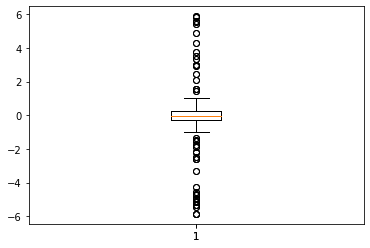

In [9]:
# Seleccionamos el atributo que vamos a medir
a = df['a']

# Seleccionamos los umbrales a partir de los cuales vamos a considerar outliers
Q1 = stats.scoreatpercentile(a, 25)
Q3 = stats.scoreatpercentile(a, 75)
RIC = Q3 - Q1
li = Q1 - 1.5*RIC #xmin
ls = Q3 + 1.5*RIC #xmax

# Observamos los límites inferior y superior
print('limite inferior: ', li)
print('limite superior: ', ls)

# Buscamos la posición de los outliers
pos_i = np.where(a<li)[0]
pos_s = np.where(a>ls)[0]
pos_outliers = np.concatenate((pos_i, pos_s))
print('Posición de outliers: ', pos_outliers)
print('Número de outliers: ', len(pos_outliers))

# Dibujamos el diagrama de caja y bigotes
prop = plt.boxplot(a)
plt.boxplot(a)
plt.show()

In [10]:
# Definir una función que, dada una columna de un dataframe, devuelva la posición de los outliers según el método box plot
def find_limits_BP(variable):
    
    Q1 = stats.scoreatpercentile(a, 25)
    Q3 = stats.scoreatpercentile(a, 75)
    RIC = Q3 - Q1
    li = Q1 - 1.5*RIC #xmin
    ls = Q3 + 1.5*RIC #xmax

    # Buscamos la posición de los outliers
    pos_i = np.where(a<li)[0]
    pos_s = np.where(a>ls)[0]
    pos_outliers = np.concatenate((pos_i, pos_s))
    
    return pos_outliers


In [13]:
# Creamos un bucle for que estime los valores outliers de cada atributo
headers = df.columns # nombre de los atributos del CSV
pos_outliers = []
for i in range(len(headers)):
    variable = df[headers[i]] # Atributo i
    pos_out = find_limits_BP(variable) # Buscamos los outliers en esa variable con la función que hemos creado
    pos_out = np.expand_dims(pos_out, axis=1) # Extpandimos las dimensiones
    pos_outliers.append(pos_out) # Lo añadimos en una lista

In [14]:
# Concatenamos todas las posiciones de outliers
po = np.vstack(pos_outliers)

# Vemos las posiciones de todos los outliers
pos_out = np.unique(po)
print('Posiciones de outliers totales: ', pos_out)

# Observamos el número de outliers
print('Numero de outliers totales: ', len(pos_out))

Posiciones de outliers totales:  [150 151 152 153 154 155 156 157 159 160 161 162 163 164 165 166 167 168
 169 171 172 173 174 175 176 177 178 179 180 181 182 184 185 186 187 188
 189 190 191 192 193 195 196 197]
Numero de outliers totales:  44
